In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as unc
import numpy as np

In [78]:
force = pd.read_csv("Force.csv")
force['disp'] = ''

In [93]:
l0 = unc.ufloat(76, 2) #initial length in mm
dl = 2 #uncertainty for ruler measurements in mm
l1 = unc.ufloat(92, 2)
l2 = unc.ufloat(110, 2)
l3 = unc.ufloat(120, 2)
l4 = unc.ufloat(138, 2)
l5 = unc.ufloat(147, 2)
l6 = unc.ufloat(160, 2)
l7 = unc.ufloat(171, 2)
l8 = unc.ufloat(186, 2)

INITIAL FORCE

In [84]:
#force.loc[:70922, 'disp'] = l_0 #assigning l_o for displacement
filtered_l0 = force.loc[(force.iloc[:,5] <= -0.67) & (force.iloc[:,5] >= -0.7)]
f0 = filtered_l0.iloc[:,5].mean()
f0_std = filtered_l0.iloc[:,5].std()/np.sqrt(filtered_l0.shape[0])
f0 = unc.ufloat(f0,f0_std)
f0

-0.6859694383740409+/-2.6830268008937934e-05

1st FORCE

In [98]:
filtered_l1 = force.loc[(force.iloc[:,5] <= -0.83) & (force.iloc[:,5] >= -0.88)]
f1 = filtered_l1.iloc[:,5].mean()
f1_std = filtered_l1.iloc[:,5].std()/np.sqrt(filtered_l0.shape[0])
f1 = unc.ufloat(f1,f1_std)
f1

-0.8575251350254658+/-6.706897865391517e-05

2nd FORCE

In [86]:
filtered_l2 = force.loc[(force.iloc[:,5] <= -1) & (force.iloc[:,5] >= -1.1)]
f2 = filtered_l2.iloc[:,5].mean()
f2_std = filtered_l2.iloc[:,5].std()/np.sqrt(filtered_l2.shape[0])
f2 = unc.ufloat(f2,f2_std)
f2

-1.0445503923748356+/-2.8647586428020356e-05

3d FORCE

In [87]:
filtered_l3 = force.loc[(force.iloc[:,5] <= -1.2) & (force.iloc[:,5] >= -1.3)]
f3 = filtered_l2.iloc[:,5].mean()
f3_std = filtered_l3.iloc[:,5].std()/np.sqrt(filtered_l3.shape[0])
f3 = unc.ufloat(f3,f3_std)
f3

-1.0445503923748356+/-4.7240103576185316e-05

4 FORCE

In [88]:
filtered_l4 = force.loc[(force.iloc[:,5] <= -1.4) & (force.iloc[:,5] >= -1.5)]
f4 = filtered_l4.iloc[:,5].mean()
f4_std = filtered_l4.iloc[:,5].std()/np.sqrt(filtered_l4.shape[0])
f4 = unc.ufloat(f4,f4_std)
f4

-1.4245929840009208+/-2.9641699257995395e-05

5 FORCE

In [89]:
filtered_l5 = force.loc[(force.iloc[:,5] <= -1.6) & (force.iloc[:,5] >= -1.7)]
f5 = filtered_l5.iloc[:,5].mean()
f5_std = filtered_l5.iloc[:,5].std()/np.sqrt(filtered_l5.shape[0])
f5 = unc.ufloat(f5,f5_std)
f5

-1.6417452594517243+/-4.00293487878917e-05

6 FORCE

In [90]:
filtered_l6 = force.loc[(force.iloc[:,5] <= -1.8) & (force.iloc[:,5] >= -1.9)]
f6 = filtered_l6.iloc[:,5].mean()
f6_std = filtered_l6.iloc[:,5].std()/np.sqrt(filtered_l6.shape[0])
f6 = unc.ufloat(f6,f6_std)
f6

-1.8523254668937807+/-3.904085497395778e-05

7 FORCE

In [91]:
filtered_l7 = force.loc[(force.iloc[:,5] <= -2) & (force.iloc[:,5] >= -2.1)]
f7 = filtered_l7.iloc[:,5].mean()
f7_std = filtered_l7.iloc[:,5].std()/np.sqrt(filtered_l7.shape[0])
f7 = unc.ufloat(f7,f7_std)
f7

-2.0528302979574655+/-3.8103420643147095e-05

In [92]:
filtered_l8 = force.loc[(force.iloc[:,5] <= -2.2) & (force.iloc[:,5] >= -2.3)]
f8 = filtered_l8.iloc[:,5].mean()
f8_std = filtered_l8.iloc[:,5].std()/np.sqrt(filtered_l8.shape[0])
f8 = unc.ufloat(f8,f8_std)
f8

-2.249405563843791+/-4.0113199426863e-05

In [132]:
k = []
for i in range(1,9,1):
    k.append((f0 - locals()[f"f{i}"]) / (locals()[f"l{i}"]/1000 - l0/1000))
k_mean = sum(obj.n for obj in k)/8
k_std = sum(obj.s for obj in k)/np.sqrt(7)
k_final = unc.ufloat(round(k_mean, 2), round(k_std, 3))
for obj in k:
   print(obj)
print('k =', k_final, '\n', k_err)

10.7+/-1.9
10.5+/-0.9
8.1+/-0.5
11.9+/-0.5
13.5+/-0.5
13.9+/-0.5
14.4+/-0.4
14.2+/-0.4
k = 12.2+/-2.1 
 19.19194543354784


In [112]:
k_err = k_std/k_mean * 100
k_err

19.19194543354784

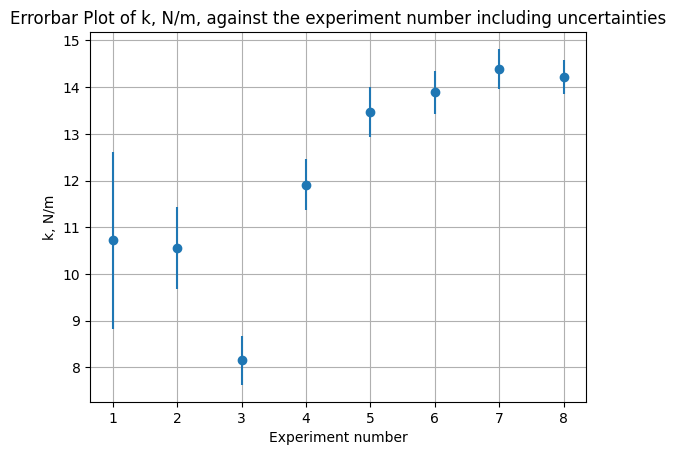

In [143]:
x = np.arange(1,9,1)
y = []
err = []
for i in k:
    y.append(i.n)
    err.append(i.s)
plt.errorbar(x, y, yerr = err, fmt = 'o')
plt.xlabel('Experiment number')  # Set x-axis label
plt.ylabel('k, N/m')  # Set y-axis label
plt.title('Errorbar Plot of k, N/m, against the experiment number including uncertainties')
plt.grid(True)